In [63]:
import csv
import igraph as g
from igraph import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
#1
g = Graph(directed=True)
g.add_vertices(25)
df = pd.read_csv('sociogram-employees-un.csv', header=None)
tuples = []
for i in range(0,25):
    for j in range(0,25):
        if(df[i][j] == 1):
            tuples.append((i,j))
g.add_edges(tuples)

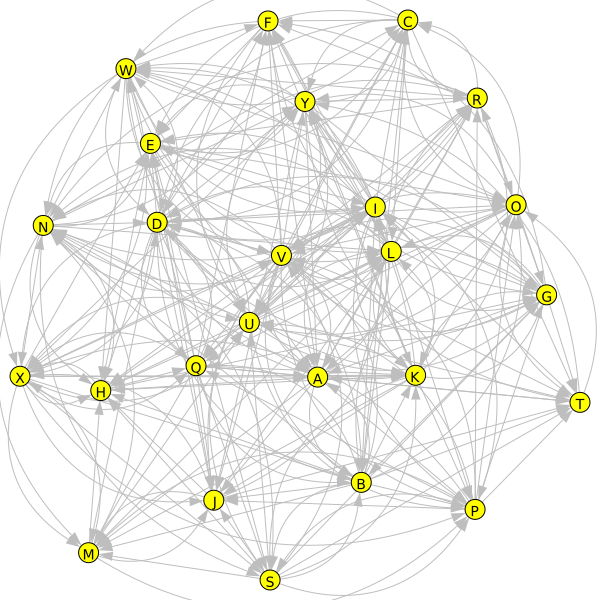

In [114]:
#2
names = ['A', 'B', 'C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
g["name"] = 'Graph'
visual_style = {}
visual_style["vertex_label"] = names
g.vs["color"] = "yellow"
#g.vs["shape"] = "sphere"
visual_style["arrow_size"] = 0.2
g.es["color"] = "gray"
plot(g,**visual_style)

Load the data and create an unweighted directed graph from the adjacency matrix. Name the nodes as letters A to Y. Set node color to yellow and shape to sphere. Set the edge’s color to gray and arrow size to 0.2.

In [41]:
#3
avg_closeness = np.mean(g.closeness())
print avg_closeness
diameter = g.diameter()
print diameter

0.773753080671
3


In [58]:
#4
avg_betweenness = np.mean(g.betweenness())
print avg_betweenness

13.04


In [46]:
#5
density = g.density()
print density
avg_degree = np.mean(g.degree())
print avg_degree

0.461666666667
22.16


In [53]:
#6
reciprocity = g.reciprocity()
print reciprocity
avg_transitivity = g.transitivity_avglocal_undirected()
#We took this function instead of the global transitivity (g.transitivity_undirected())
#since according to the assignment the transitivity had to be averaged
print avg_transitivity

0.483754512635
0.718530402174


In [62]:
#7
eccentricity = g.eccentricity()
print np.mean(eccentricity)
avg_distance = g.average_path_length()
print avg_distance

2.12
1.54333333333


D
[413.2530751948394, 678.6441263889408, 487.9128709499654, 1000.0, 394.59455581297954, 190.3973913661814, 562.294790553191, 326.65800063169013, 754.7999137169899, 266.0650828379916, 686.8545401892445, 736.8024185032007, 283.8371913912824, 745.2176276637583, 549.2442781664131, 490.6222279669463, 643.7023587364005, 510.34294232426566, 596.6112969549406, 253.2413552842804, 422.63223034325705, 890.222594581986, 527.9041806094259, 805.2345687113532, 447.5643035536501]


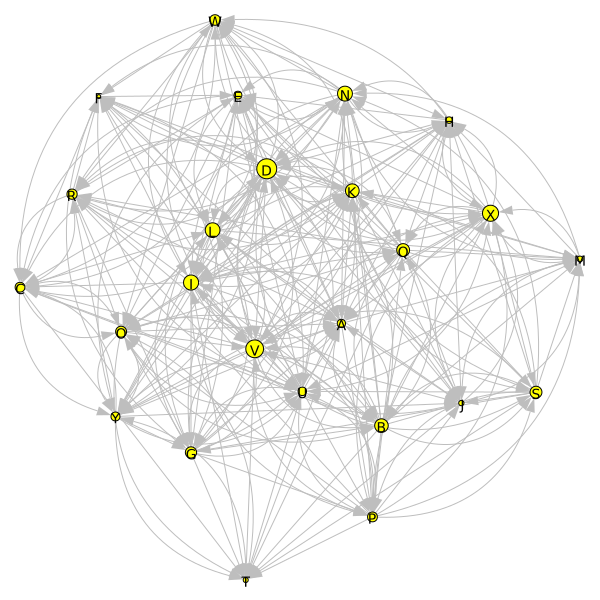

In [99]:
#8
hub_scores = g.hub_score()
hubbiest_employee = names[hub_scores.index(np.max(hub_scores))]
print(hubbiest_employee)
visual_style["vertex_size"] = [x * 20 for x in hub_scores]
plot(g,**visual_style)

#print hubbiest_employee



A


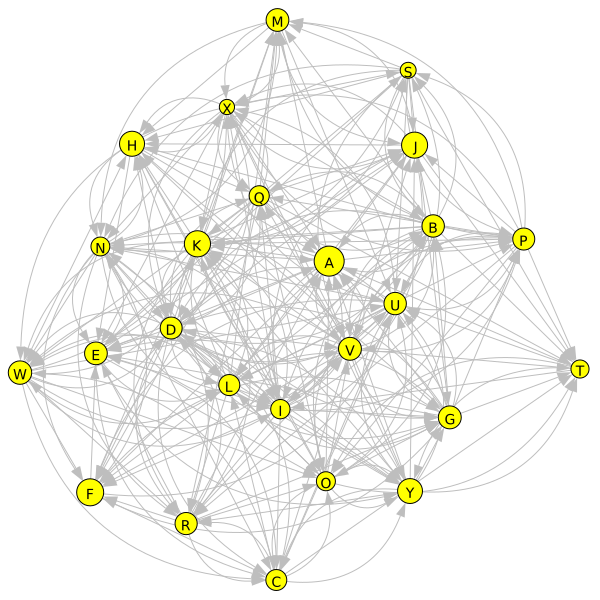

In [106]:
#9
auth_scores = g.authority_score()
most_authoritive_employee = names[auth_scores.index(np.max(auth_scores))]
print(most_authoritive_employee)
visual_style["vertex_size"] = [x * 30 for x in auth_scores]
plot(g,**visual_style)

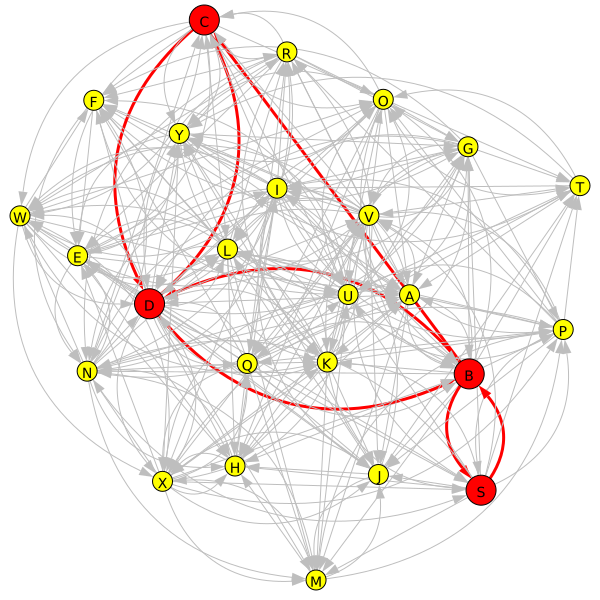

In [116]:
#10
diams = g.get_diameter()
visual_style["vertex_size"] = [30 if x in diams else 20 for x in range(0,25)]
visual_style["vertex_color"] = ["red" if x in diams else "yellow" for x in range(0,25)]
visual_style["edge_width"] = [3 if (x in diams and y in diams) else 1 for (x,y) in tuples]
visual_style["edge_color"] = ["red" if (x in diams and y in diams) else "gray" for (x,y) in tuples]
plot(g,**visual_style)

In [151]:
#11
#Part 2: Undirected Graph
g2 = Graph(directed=False)
g2.add_vertices(names)
df = pd.read_csv('sociogram-employees-un.csv', header=None)
tuples = []
for i in range(0,25):
    for j in range(0,25):
        if(df[i][j] == 1):
            tuples.append((i,j))
g2.add_edges(tuples)

#Reset visual style
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = "yellow"
visual_style["edge_width"] = 1
visual_style["edge_color"] = "gray"
plot(g2,**visual_style)

#Finding cliques
cliques = [names[x] for x in g2.largest_cliques()[0]]
print cliques

['D', 'A', 'K', 'V', 'I', 'Q', 'B', 'H', 'J', 'X']


In [127]:
#12
max_cliques_count = len(g2.maximal_cliques())
print max_cliques_count

128

In [128]:
#13
cohesion = g2.vertex_connectivity()
print cohesion

13


In [154]:
#14
clusters = g2.community_edge_betweenness()

print (clusters)
print(clusters.as_clustering())
#for row in clusters.as_clustering():
#    print (names[x] for x in row)


Dendrogram, 25 elements, 24 merges

12 9 2 15 5 6 7 0 8 13 21 22 1 3 16 23 10 17 11 14 20 18 4 24 19
|  | | |  | | | | | |  |  |  | | |  |  |  |  |  |  |  |  | |  |
|  | | |  | | | | | |  `--'  | | `--'  |  |  |  |  |  |  | |  |
|  | | |  | | | | | |   |    | |  |    |  |  |  |  |  |  | |  |
|  | | |  | | | | | |   |    | `--'    |  |  |  |  |  |  | |  |
|  | | |  | | | | | |   |    |  |      |  |  |  |  |  |  | |  |
|  | | |  | | | | | |   |    `--'      |  |  |  |  |  |  | |  |
|  | | |  | | | | | |   |     |        |  |  |  |  |  |  | |  |
|  | | |  | | | | | |   `-----'        |  |  |  |  |  |  | |  |
|  | | |  | | | | | |      |           |  |  |  |  |  |  | |  |
|  | | |  | | | | | `------'           |  |  |  |  |  |  | |  |
|  | | |  | | | | |    |               |  |  |  |  |  |  | |  |
|  | | |  | | | | `----'               |  |  |  |  |  |  | |  |
|  | | |  | | | |   |                  |  |  |  |  |  |  | |  |
|  | | |  | | | |   `------------------'  |  |  |  |  |  | |  |
|  

In [155]:
#15
components = g2.components()
print components

Clustering with 25 elements and 1 clusters
[0] A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y


In [ ]:
#16
gnodes=set(n.index for n in g2.vs())
cycles=[]
root = None
while gnodes:  # loop over connected components
    if root is None:
        root=gnodes.pop()
    stack=[root]
    pred={root:root} 
    used={root:set()}
    while stack:  # walk the spanning tree finding cycles
        z=stack.pop() # use last-in so cycles easier to find
        zused=used[z]
        for nbr in g2.neighbors(z,mode='ALL'):
            if nbr not in used:   # new node 
                pred[nbr]=z
                stack.append(nbr)
                used[nbr]=set([z])
            elif nbr is z:        # self loops
                cycles.append([z]) 
            elif nbr not in zused:# found a cycle
                pn=used[nbr]
                cycle=[nbr,z]
                p=pred[z]
                while p not in pn:
                    cycle.append(p)
                    p=pred[p]
                cycle.append(p)
                cycles.append(cycle)
                used[nbr].add(z)
    gnodes-=set(pred)
print cycles

In [ ]:
#17
n_triangles = len(g2.cliques(min=3,max=3))
print n_triangles